### Finding $\vec{\pi}$

We can now see that in the long term we have
$$ \vec{\pi} = \vec{\pi} \mathcal{P}$$
as long as $\displaystyle \lim_{n \to \infty} \vec{\pi}_n$ exists.

This is an eigenvalue-eigenvector problem:
$$ 1 \cdot \vec{\pi} = \mathcal{P}^T \vec{\pi}, $$
where $\vec{\pi}$ is an eigenvector for the eigenvalue $1$ of $\mathcal{P}$.

Below, we set up the matrix $\mathcal{P}$ and find the corresponding eigenvector with eigenvalue $1$.

*Observe that $\vec{\pi}$ should be normalized so that the sum of its elements is 1.*

In [69]:
import numpy as np


Lambda = 1

# Define the transtiion matrix P

P = [[ np.exp(-Lambda) , 0 , 1 - np.exp(-Lambda) ],
    [  Lambda*np.exp(-Lambda), np.exp(-Lambda), 1-(1+Lambda)*np.exp(-Lambda) ],
    [ Lambda*Lambda*np.exp(-Lambda)/2, Lambda*np.exp(-Lambda), 1-Lambda*(1+Lambda/2)*np.exp(-Lambda) ]]

vals, vecs = np.linalg.eig(np.transpose(P)); # Calculate the eigenvalues and eigenvectors of P transpose
i = np.argmax(vals) # Find the index of the largest eigenvalue

pi = np.real(vecs[:,i])  # pi is the eigenvector corresponding to the largest eigenvalue


In [70]:
# We normalize the eigenvector so that the sum of the elements is 1

def normalize_vector(v):
    norm = np.sum(v)  # Compute the vector's magnitude
    if norm == 0:
        return v  # Return the original vector if its length is zero (avoid division by zero)
    return v / norm

pi = normalize_vector(-pi)

print(pi)

[0.28471134 0.26313999 0.45214867]


### Calculations for $W$

We now calculate $W$, the expected weeks when the store loses a sale.
$$
W = \lim_{n \to \infty} \sum_{i=1}^3 {\rm Pr}(D_n>X_n|X_n=i) \cdot {\rm Pr}(X_n=i)
$$
which can be simplified to
$$
W = \lim_{n \to \infty} \sum_{i=1}^3 \sum_{j=i+1}^{\infty} {\rm Pr}(D_n=j) \cdot {\rm Pr}(X_n=i)
$$
which is
$$
W = e^{-\lambda} \sum_{i=1}^3 \pi_i \sum_{j=i+1}^{\infty} \frac{\lambda^j}{j!}
$$

We can simplify the series in $j$, since that is the tail of the Taylor series for $e^\lambda$:
$$
\sum_{j=k+1}^\infty \frac{\lambda^j}{j!} = e^\lambda - \sum_{j=0}^k \frac{\lambda^j}{j!}
$$

We conclude that
$$
W = e^{-\lambda} \left[ \pi_1 (e^{\lambda} - 1 - \lambda) + \pi_2 (e^{\lambda} - 1 - \lambda - \frac{\lambda^2}{2}) + \pi_3 (e^{\lambda} - 1 - \lambda - \frac{\lambda^2}{2} - \frac{\lambda^3}{6}) \right]
$$


In [133]:
import math

W=0

# Calculate with approximation of the series to infinity with the series up to N
#
# N=100

# for i in range(3):
#     for j in range(i+2,N):
#        W += np.exp(-Lambda)*pi[i]*Lambda**j/(np.math.factorial(j))


# Calculate without approximation, but requiring some extra series manipulation
#
a=1
for i in range(3):
    a += Lambda**(i+1)/math.factorial(i+1);
    W += np.exp(-Lambda)*pi[i]*(np.exp(Lambda)-a)


print('W = ', W)
    

W =  0.1049484219513167


### Calculations for $L$

Here we want to calculate the lost sales directly, which requires a simple change in the calculation done above:
$$
L= \lim_{n \to \infty} \sum_{i=1}^3 (D_n-X_n) {\rm Pr}(D_n>X_n|X_n=i) \cdot {\rm Pr}(X_n=i)
$$
which can be simplified to
$$
L = \lim_{n \to \infty} \sum_{i=1}^3 \sum_{j=i+1}^{\infty} (j-i) {\rm Pr}(D_n=j) \cdot {\rm Pr}(X_n=i)
$$
which is
$$
L = e^{-\lambda} \sum_{i=1}^3 \pi_i \sum_{j=i+1}^{\infty} (j-i) \frac{\lambda^j}{j!}
$$
$$
L = e^{-\lambda} \sum_{i=1}^3 \pi_i \left[ \sum_{j=i+1}^{\infty} \frac{\lambda^j}{(j-1)!} - i \sum_{j=i+1}^{\infty} \frac{\lambda^j}{j!}\right]
$$
$$
L = e^{-\lambda} \sum_{i=1}^3 \pi_i \left[ \lambda \sum_{j=i}^{\infty} \frac{\lambda^j}{j!} - i \sum_{j=i+1}^{\infty} \frac{\lambda^j}{j!}\right]
$$

We conclude that
$$
L = \lambda e^{-\lambda} \left[ \pi_1 (e^{\lambda} - 1 ) + \pi_2 (e^{\lambda} - 1 - \lambda) + \pi_3 (e^{\lambda} - 1 - \lambda - \frac{\lambda^2}{2}) \right]
- e^{-\lambda} \left[ \pi_1 (e^{\lambda} - 1 - \lambda) + 2\pi_2 (e^{\lambda} - 1 - \lambda - \frac{\lambda^2}{2}) + 3\pi_3 (e^{\lambda} - 1 - \lambda - \frac{\lambda^2}{2} - \frac{\lambda^3}{6}) \right]
$$


In [134]:
import math

L=0


# Calculate without approximation, but requiring some extra series manipulation
#
a=0
for i in range(3):
    a += Lambda**(i)/math.factorial(i);
    L += Lambda*np.exp(-Lambda)*pi[i]*(np.exp(Lambda)-a)

a=1
for i in range(3):
    a += Lambda**(i+1)/math.factorial(i+1);
    L -= (i+1)*np.exp(-Lambda)*pi[i]*(np.exp(Lambda)-a)


print('L = ', L)
    

L =  0.1425625970971197


### Calculate the expected number of sales per week.

In [76]:
E = 0

a = 0
for i in range(3):
    a += np.exp(-Lambda)*Lambda**i/math.factorial(i)
    E += Lambda*pi[i]*a

a = 1-np.exp(-Lambda)
for i in range(3):
    a -= np.exp(-Lambda)*Lambda**(i+1)/math.factorial(i+1)
    E += (i+1)*pi[i]*a

    
print(E)

0.8574374029028802


### Plots for lots of different values of $\lambda \in [0,10]$

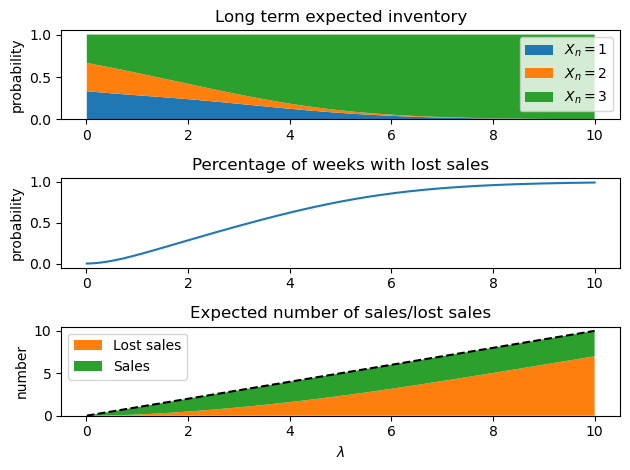

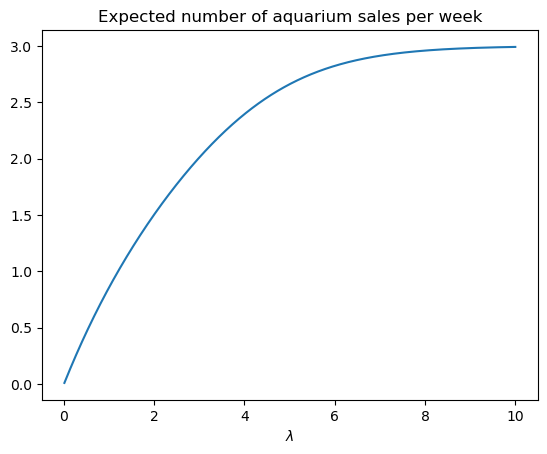

In [91]:
import numpy as np;
import matplotlib.pyplot as plt;
import math;

Npts=1001

Lambda_all = np.linspace(0,10,Npts)[1:]
Npts -= 1



def normalize_vector(v):
    norm = np.sum(v)  # Compute the vector's magnitude
    if norm == 0:
        return v  # Return the original vector if its length is zero (avoid division by zero)
    return v / norm

pi_all = np.zeros([Npts,3])
W_all = np.zeros(Npts)
L_all = np.zeros(Npts)
E_all = np.zeros(Npts)



for ind in range(Npts):
    Lambda = Lambda_all[ind]
    
    P = [[ np.exp(-Lambda) , 0 , 1 - np.exp(-Lambda) ],
    [  Lambda*np.exp(-Lambda), np.exp(-Lambda), 1-(1+Lambda)*np.exp(-Lambda) ],
    [ Lambda*Lambda*np.exp(-Lambda)/2, Lambda*np.exp(-Lambda), 1-Lambda*(1+Lambda/2)*np.exp(-Lambda) ]]

    vals, vecs = np.linalg.eig(np.transpose(P)); # Calculate the eigenvalues and eigenvectors of P transpose
    i = np.argmax(vals) # Find the index of the largest eigenvalue

    pi = np.real(vecs[:,i])  # pi is the eigenvector corresponding to the largest eigenvalue

    # We normalize the eigenvector so that the sum of the elements is 1
    pi = normalize_vector(-pi)

    pi_all[ind,:]=pi


    # Calculate the expected percentage of weeks with lost sales
    
    W=0

    a=1
    for i in range(3):
        a += Lambda**(i+1)/math.factorial(i+1);
        W += np.exp(-Lambda)*pi[i]*(np.exp(Lambda)-a)

    W_all[ind] = W


    # Calculate the expected number of lost sales
    
    L=0

    a=0
    for i in range(3):
        a += Lambda**(i)/math.factorial(i);
        L += Lambda*np.exp(-Lambda)*pi[i]*(np.exp(Lambda)-a)
    
    a=1
    for i in range(3):
        a += Lambda**(i+1)/math.factorial(i+1);
        L -= (i+1)*np.exp(-Lambda)*pi[i]*(np.exp(Lambda)-a)

    L_all[ind]=L


    # Calculate the expected number of sales
    
    E = 0

    a = 0
    for i in range(3):
        a += Lambda**i/math.factorial(i)
        E += Lambda*pi[i]*a
    
    a = np.exp(Lambda)-1
    for i in range(3):
        a -= Lambda**(i+1)/math.factorial(i+1)
        E += (i+1)*pi[i]*a

    E_all[ind]=E*np.exp(-Lambda)
    

figure, axis = plt.subplots(3)


axis[0].stackplot(Lambda_all,pi_all[:,0],pi_all[:,1],pi_all[:,2]);
axis[0].legend(['$X_n=1$', '$X_n=2$','$X_n=3$']);
axis[0].set_title('Long term expected inventory');
axis[0].set_ylabel('probability')

axis[1].plot(Lambda_all, W_all);
axis[1].set_title('Percentage of weeks with lost sales')
axis[1].set_ylabel('probability')

axis[2].stackplot(Lambda_all,L_all,E_all,colors=['#ff7f0e', '#2ca02c']);
axis[2].plot(Lambda_all, Lambda_all,'--k');
axis[2].set_title('Expected number of sales/lost sales')
axis[2].set_xlabel('$\\lambda$')
axis[2].set_ylabel('number')
axis[2].legend(['Lost sales','Sales']);


figure.tight_layout();

plt.savefig('aquarium.png');




fig,ax = plt.subplots(1);
ax.plot(Lambda_all, E_all);
ax.set_title('Expected number of aquarium sales per week');
ax.set_xlabel('$\\lambda$');

plt.savefig('aquarium-sales.png');

### Calculate sensitivity $S(L^\star, \lambda)$

In [92]:
ind1 = int(np.where(Lambda_all == 1)[0][0]) # Find index when Lambda is 1

Delta = Lambda_all[ind1+1]-Lambda_all[ind1]
Delta_L = L_all[ind1+1] - L_all[ind1]

S = (Delta_L/Delta)*(Lambda_all[ind1]/L_all[ind1])

print('Sensitivity S(L,lambda)=',S)

Sensitivity S(L,lambda)= 1.859042493437576
